In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_mean=pd.read_csv('hospitaldata_mean.csv')
df_knn=pd.read_csv('hospitaldata_knn.csv')
df_iterative=pd.read_csv('hospitaldata_iterative.csv')

In [3]:
df_mean.head()

,Unnamed: 0,Unnamed: 0.1,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,...,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,10001,3.0,14.500000,4.500000,8.9,12.5,16.2,13.7,...,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,506,21,2
1,1,1,10005,3.0,15.500000,3.230405,10.9,15.3,20.8,15.7,...,85,88,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,1135,34,3
2,2,2,10006,3.6,14.900000,3.200000,8.8,13.2,17.2,17.2,...,82,84,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,579,22,2
3,3,3,10007,2.8,13.172227,3.230405,8.3,13.3,21.6,15.9,...,86,85,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,185,27,2
4,4,4,10011,2.6,14.100000,3.700000,8.9,13.1,16.1,12.4,...,81,86,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,2193,33,3


In [4]:
df_mean.shape

(3529, 40)

In [5]:
c = df_mean['STAR_RATING'].value_counts(dropna=True)
p = df_mean['STAR_RATING'].value_counts(dropna=True, normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
3,1612,0.456787
4,890,0.252196
2,683,0.193539
1,180,0.051006
5,164,0.046472


# Drop Last Two Digits of ZIP Code

In [6]:
df_mean['ZIP Code'] = df_mean['ZIP Code'].astype(str).str[:-2].astype(np.int64)
df_knn['ZIP Code'] = df_knn['ZIP Code'].astype(str).str[:-2].astype(np.int64)
df_iterative['ZIP Code'] = df_iterative['ZIP Code'].astype(str).str[:-2].astype(np.int64)

In [7]:
df_mean.head()

,Unnamed: 0,Unnamed: 0.1,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,...,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,10001,3.0,14.500000,4.500000,8.9,12.5,16.2,13.7,...,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,363,506,21,2
1,1,1,10005,3.0,15.500000,3.230405,10.9,15.3,20.8,15.7,...,85,88,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,359,1135,34,3
2,2,2,10006,3.6,14.900000,3.200000,8.8,13.2,17.2,17.2,...,82,84,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,356,579,22,2
3,3,3,10007,2.8,13.172227,3.230405,8.3,13.3,21.6,15.9,...,86,85,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,364,185,27,2
4,4,4,10011,2.6,14.100000,3.700000,8.9,13.1,16.1,12.4,...,81,86,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,352,2193,33,3


# Model Selection - Mean

In [8]:
y=df_mean['STAR_RATING']
cols=["COMP_HIP_KNEE","MORT_30_AMI","MORT_30_CABG","MORT_30_COPD","MORT_30_HF","MORT_30_PN","MORT_30_STK",
      "PSI_10_POST_KIDNEY","PSI_11_POST_RESP","PSI_12_POSTOP_PULMEMB_DVT","PSI_13_POST_SEPSIS","PSI_14_POSTOP_DEHIS",
      "PSI_15_ACC_LAC","PSI_3_ULCER","PSI_4_SURG_COMP","PSI_6_IAT_PTX","PSI_8_POST_HIP","PSI_90_SAFETY",
      "PSI_9_POST_HEM"
      ,"H_CLEAN_LINEAR_SCORE","H_COMP_1_LINEAR_SCORE","H_COMP_2_LINEAR_SCORE",
      "H_COMP_3_LINEAR_SCORE","H_COMP_5_LINEAR_SCORE","H_COMP_6_LINEAR_SCORE","H_COMP_7_LINEAR_SCORE"
      ,"H_QUIET_LINEAR_SCORE"
      #,'ZIP Code'
      #,"H_HSP_RATING_LINEAR_SCORE"
     ]
x=df_mean[cols]

In [9]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np
#stscaler = StandardScaler().fit(x)
#x_stand = stscaler.transform(x)

In [10]:
#from sklearn.preprocessing import normalize
#x_norm=x.values
# Any Pre-processing needed?
#x_norm = normalize(x_norm)

In [11]:
import sklearn.model_selection as cv

SEED = 1

(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.20, random_state = SEED)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score


# Instantiate individual classifiers
rf = RandomForestClassifier(n_estimators=150, random_state=SEED)
knn = KNN(n_neighbors=11)

# Define a list called classifier that contains
# the tuples (classifier_name, classifier)
classifiers = [('Random Forest', rf),
               ('K Nearest Neighbours', knn)
              ]

In [13]:
for clf_name, clf in classifiers:
#fit clf to the training set
    clf.fit(x_train, y_train)
# Predict the labels of the test set
    y_pred = clf.predict(x_test)

# Evaluate the accuracy of clf on the test set
    print('Accuracy: {:s} : {:.3f}'.format(clf_name,accuracy_score(y_test, y_pred)))
    print('Precision: {:s} : {:.3f}'.format(clf_name,precision_score(y_test, y_pred, average='macro')))
    print('Recall: {:s} : {:.3f}'.format(clf_name,recall_score(y_test, y_pred, average='macro')))
    print('F1 Score: {:s} : {:.3f}'.format(clf_name,f1_score(y_test, y_pred, average='macro')))

Accuracy: Random Forest : 0.661
Precision: Random Forest : 0.672
Recall: Random Forest : 0.562
F1 Score: Random Forest : 0.602
Accuracy: K Nearest Neighbours : 0.598
Precision: K Nearest Neighbours : 0.639
Recall: K Nearest Neighbours : 0.486
F1 Score: K Nearest Neighbours : 0.532


# Feature Importance

In [14]:
model = rf.fit(x_train, y_train)

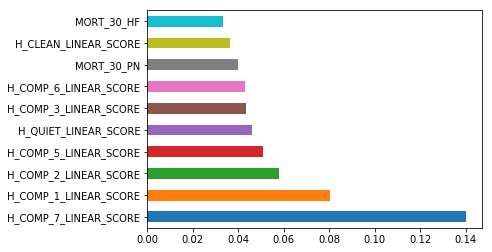

In [15]:
feat_importances = pd.Series(model.feature_importances_, index=cols)
feat_importances.nlargest(10).plot(kind='barh')

# Model Selection - KNN

In [16]:
y=df_knn['STAR_RATING']
cols=["COMP_HIP_KNEE","MORT_30_AMI","MORT_30_CABG","MORT_30_COPD","MORT_30_HF","MORT_30_PN","MORT_30_STK",
      "PSI_10_POST_KIDNEY","PSI_11_POST_RESP","PSI_12_POSTOP_PULMEMB_DVT","PSI_13_POST_SEPSIS","PSI_14_POSTOP_DEHIS",
      "PSI_15_ACC_LAC","PSI_3_ULCER","PSI_4_SURG_COMP","PSI_6_IAT_PTX","PSI_8_POST_HIP","PSI_90_SAFETY",
      "PSI_9_POST_HEM"
      ,"H_CLEAN_LINEAR_SCORE","H_COMP_1_LINEAR_SCORE","H_COMP_2_LINEAR_SCORE",
      "H_COMP_3_LINEAR_SCORE","H_COMP_5_LINEAR_SCORE","H_COMP_6_LINEAR_SCORE","H_COMP_7_LINEAR_SCORE"
      ,"H_QUIET_LINEAR_SCORE"
      #,'ZIP Code'
      #,"H_HSP_RATING_LINEAR_SCORE"
     ]
x=df_knn[cols]

In [17]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np
#stscaler = StandardScaler().fit(x)
#x_stand = stscaler.transform(x)

In [18]:
#from sklearn.preprocessing import normalize
#x_norm=x.values
# Any Pre-processing needed?
#x_norm = normalize(x_norm)

In [19]:
import sklearn.model_selection as cv

SEED = 1

(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.20, random_state = SEED)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score


# Instantiate individual classifiers
rf = RandomForestClassifier(n_estimators=125, random_state=SEED)
knn = KNN(n_neighbors=15)

# Define a list called classifier that contains
# the tuples (classifier_name, classifier)
classifiers = [('Random Forest', rf),
               ('K Nearest Neighbours', knn)
              ]

In [21]:
for clf_name, clf in classifiers:
#fit clf to the training set
    clf.fit(x_train, y_train)
# Predict the labels of the test set
    y_pred = clf.predict(x_test)

# Evaluate the accuracy of clf on the test set
    print('Accuracy: {:s} : {:.3f}'.format(clf_name,accuracy_score(y_test, y_pred)))
    print('Precision: {:s} : {:.3f}'.format(clf_name,precision_score(y_test, y_pred, average='macro')))
    print('Recall: {:s} : {:.3f}'.format(clf_name,recall_score(y_test, y_pred, average='macro')))
    print('F1 Score: {:s} : {:.3f}'.format(clf_name,f1_score(y_test, y_pred, average='macro')))

Accuracy: Random Forest : 0.669
Precision: Random Forest : 0.682
Recall: Random Forest : 0.560
F1 Score: Random Forest : 0.603
Accuracy: K Nearest Neighbours : 0.609
Precision: K Nearest Neighbours : 0.635
Recall: K Nearest Neighbours : 0.490
F1 Score: K Nearest Neighbours : 0.532


# Feature Importance

In [22]:
model = rf.fit(x_train, y_train)

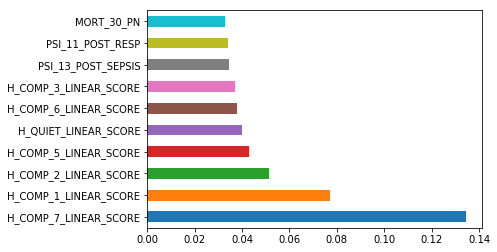

In [23]:
feat_importances = pd.Series(model.feature_importances_, index=cols)
feat_importances.nlargest(10).plot(kind='barh')

# Model Selection - Iterative

In [24]:
y=df_iterative['STAR_RATING']
cols=["COMP_HIP_KNEE","MORT_30_AMI","MORT_30_CABG","MORT_30_COPD","MORT_30_HF","MORT_30_PN","MORT_30_STK",
      "PSI_10_POST_KIDNEY","PSI_11_POST_RESP","PSI_12_POSTOP_PULMEMB_DVT","PSI_13_POST_SEPSIS","PSI_14_POSTOP_DEHIS",
      "PSI_15_ACC_LAC","PSI_3_ULCER","PSI_4_SURG_COMP","PSI_6_IAT_PTX","PSI_8_POST_HIP","PSI_90_SAFETY",
      "PSI_9_POST_HEM"
      ,"H_CLEAN_LINEAR_SCORE","H_COMP_1_LINEAR_SCORE","H_COMP_2_LINEAR_SCORE",
      "H_COMP_3_LINEAR_SCORE","H_COMP_5_LINEAR_SCORE","H_COMP_6_LINEAR_SCORE","H_COMP_7_LINEAR_SCORE"
      ,"H_QUIET_LINEAR_SCORE"
      #,'ZIP Code'
      #,"H_HSP_RATING_LINEAR_SCORE"
     ]
x=df_iterative[cols]

In [25]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np
#stscaler = StandardScaler().fit(x)
#x_stand = stscaler.transform(x)

In [26]:
#from sklearn.preprocessing import normalize
#x_norm=x.values
# Any Pre-processing needed?
#x_norm = normalize(x_norm)

In [27]:
import sklearn.model_selection as cv

SEED = 1

(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.20, random_state = SEED)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score


# Instantiate individual classifiers
rf = RandomForestClassifier(n_estimators=120, random_state=SEED)
knn = KNN(n_neighbors=15)

# Define a list called classifier that contains
# the tuples (classifier_name, classifier)
classifiers = [('Random Forest', rf),
               ('K Nearest Neighbours', knn)
              ]

In [29]:
for clf_name, clf in classifiers:
#fit clf to the training set
    clf.fit(x_train, y_train)
# Predict the labels of the test set
    y_pred = clf.predict(x_test)

# Evaluate the accuracy of clf on the test set
    print('Accuracy: {:s} : {:.3f}'.format(clf_name,accuracy_score(y_test, y_pred)))
    print('Precision: {:s} : {:.3f}'.format(clf_name,precision_score(y_test, y_pred, average='macro')))
    print('Recall: {:s} : {:.3f}'.format(clf_name,recall_score(y_test, y_pred, average='macro')))
    print('F1 Score: {:s} : {:.3f}'.format(clf_name,f1_score(y_test, y_pred, average='macro')))

Accuracy: Random Forest : 0.700
Precision: Random Forest : 0.731
Recall: Random Forest : 0.595
F1 Score: Random Forest : 0.643
Accuracy: K Nearest Neighbours : 0.623
Precision: K Nearest Neighbours : 0.638
Recall: K Nearest Neighbours : 0.485
F1 Score: K Nearest Neighbours : 0.529


# Feature Importance

In [30]:
model = rf.fit(x_train, y_train)

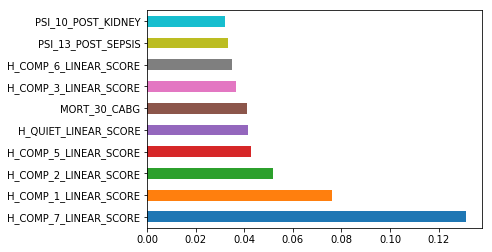

In [31]:
feat_importances = pd.Series(model.feature_importances_, index=cols)
feat_importances.nlargest(10).plot(kind='barh')